# Guide
## Code
In [4] `base_dir` : 실제 데이터 경로로 변경 필요

In [1]:
from tensorflow import keras
from tensorflow.keras import layers, optimizers
import os

2024-11-24 13:53:54.398165: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
image_size = (299, 299)
batch_size = 32

In [4]:
# 데이터셋 로드
from tensorflow.keras.utils import image_dataset_from_directory

# 실제 데이터의 경로로 변경 필요
base_dir = "/tf/Fixed_Data/Data_Final/Step2-2"

train_dataset = image_dataset_from_directory(
    os.path.join(base_dir, 'train'),
    image_size=image_size,
    batch_size=batch_size)

validation_dataset = image_dataset_from_directory(
    os.path.join(base_dir, 'validation'),
    image_size=image_size,
    batch_size=batch_size)

test_dataset = image_dataset_from_directory(
    os.path.join(base_dir, 'test'),
    image_size=image_size,
    batch_size=batch_size)

Found 11340 files belonging to 18 classes.
Found 3240 files belonging to 18 classes.
Found 1620 files belonging to 18 classes.


2024-11-24 13:53:56.109325: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-24 13:53:56.112537: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-24 13:53:56.112624: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [5]:
from tensorflow.keras.applications import InceptionV3
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# 입력 레이어 정의 및 데이터 정규화
inputs = layers.Input(shape=(299, 299, 3))
x = layers.Rescaling(1./255)(inputs)

# InceptionV3 모델 사용
x = base_model(x, training=False)

# 새로운 레이어 추가
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(18, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

for layer in base_model.layers:
    layer.trainable = False


In [6]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 299, 299, 3)       0         
                                                                 
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 18)                36882     
                                                                 
Total params: 21839666 (83.31 MB)
Trainable params: 36882 (144.07 KB)
Non-trainable params: 21802784 (83.17 MB)
_______________

In [7]:

# 학습률 및 옵티마이저 설정
optimizer = optimizers.RMSprop(learning_rate=1e-5)

# 모델 컴파일
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=100
)


Epoch 1/100


2024-11-24 13:54:01.589317: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2024-11-24 13:54:01.828931: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


  1/355 [..............................] - ETA: 22:01 - loss: 3.0267 - accuracy: 0.0312

2024-11-24 13:54:02.233601: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x8978340 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-11-24 13:54:02.233622: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2024-11-24 13:54:02.236894: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-24 13:54:02.306977: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


355/355 [==============================] - 23s 55ms/step - loss: 2.8142 - accuracy: 0.1244 - val_loss: 2.6205 - val_accuracy: 0.2170
Epoch 2/100
355/355 [==============================] - 18s 50ms/step - loss: 2.4630 - accuracy: 0.3333 - val_loss: 2.3112 - val_accuracy: 0.4512
Epoch 3/100
355/355 [==============================] - 18s 51ms/step - loss: 2.1721 - accuracy: 0.5259 - val_loss: 2.0405 - val_accuracy: 0.5920
Epoch 4/100
355/355 [==============================] - 18s 50ms/step - loss: 1.9186 - accuracy: 0.6244 - val_loss: 1.8072 - val_accuracy: 0.6574
Epoch 5/100
355/355 [==============================] - 18s 50ms/step - loss: 1.7022 - accuracy: 0.6756 - val_loss: 1.6091 - val_accuracy: 0.7006
Epoch 6/100
355/355 [==============================] - 18s 51ms/step - loss: 1.5211 - accuracy: 0.7096 - val_loss: 1.4455 - val_accuracy: 0.7278
Epoch 7/100
355/355 [==============================] - 18s 50ms/step - loss: 1.3709 - accuracy: 0.7351 - val_loss: 1.3093 - val_accuracy: 0.74

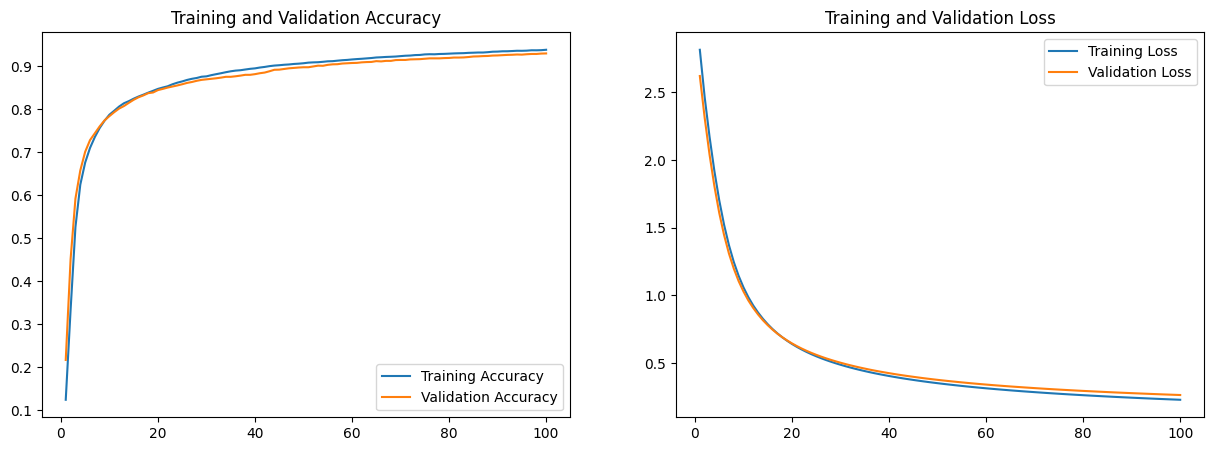

In [9]:
# 훈련 정확도와 손실 그래프 생성
import matplotlib.pyplot as plt 

acc = history.history['accuracy']         
val_acc = history.history['val_accuracy']   
loss = history.history['loss']             
val_loss = history.history['val_loss']     
epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [10]:
test_loss, test_acc = model.evaluate(test_dataset)

print(f"test accuracy: {test_acc}")
print(f"test loss: {test_loss}")

51/51 [==============================] - 3s 46ms/step - loss: 0.2507 - accuracy: 0.9327
test accuracy: 0.9327160716056824
test loss: 0.25074586272239685
